In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
        
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/kaggle/input/top-1000-global-tech-companies-dataset-2024/Top 1000 technology companies.csv


# 🏢 Top 1k Tech Companies 📊 EDA 

Exploratory data analysis on Kaggles [Top 100 Global Tech Companies Dataset 2024](https://www.kaggle.com/datasets/muhammadehsan000/top-1000-global-tech-companies-dataset-2024/data) dataset. The dataset contains the following columns

| Column | Description | 
| ------ | ----------- | 
| `Ranking`    | Worldwide ranking | 
| `Company`    | Company or firm name | 
| `Market Cap` | Representing the total market value of its outstanding shares of stock | 
| `Stock`      | Ticker symbol for stock exchange identification | 
| `Country`    | Headquarters location of the company | 
| `Sector`     | Broad category – but all companies here belong to the Technology sector | 
| `Industry`   | Specific focus within the Technology sector | 

In [23]:
tech = pd.read_csv('/kaggle/input/top-1000-global-tech-companies-dataset-2024/Top 1000 technology companies.csv')
print(f"Rows: {tech.shape[0]:,}")
print(f"Cols: {tech.shape[1]:,}")
print(tech.dtypes)
tech.head(3)

Rows: 1,000
Cols: 7
Ranking        int64
Company       object
Market Cap    object
Stock         object
Country       object
Sector        object
Industry      object
dtype: object


,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors


# 🗺️ Investigating the Countries

In this section we are going to investigate distributions per country, independent of a single company.

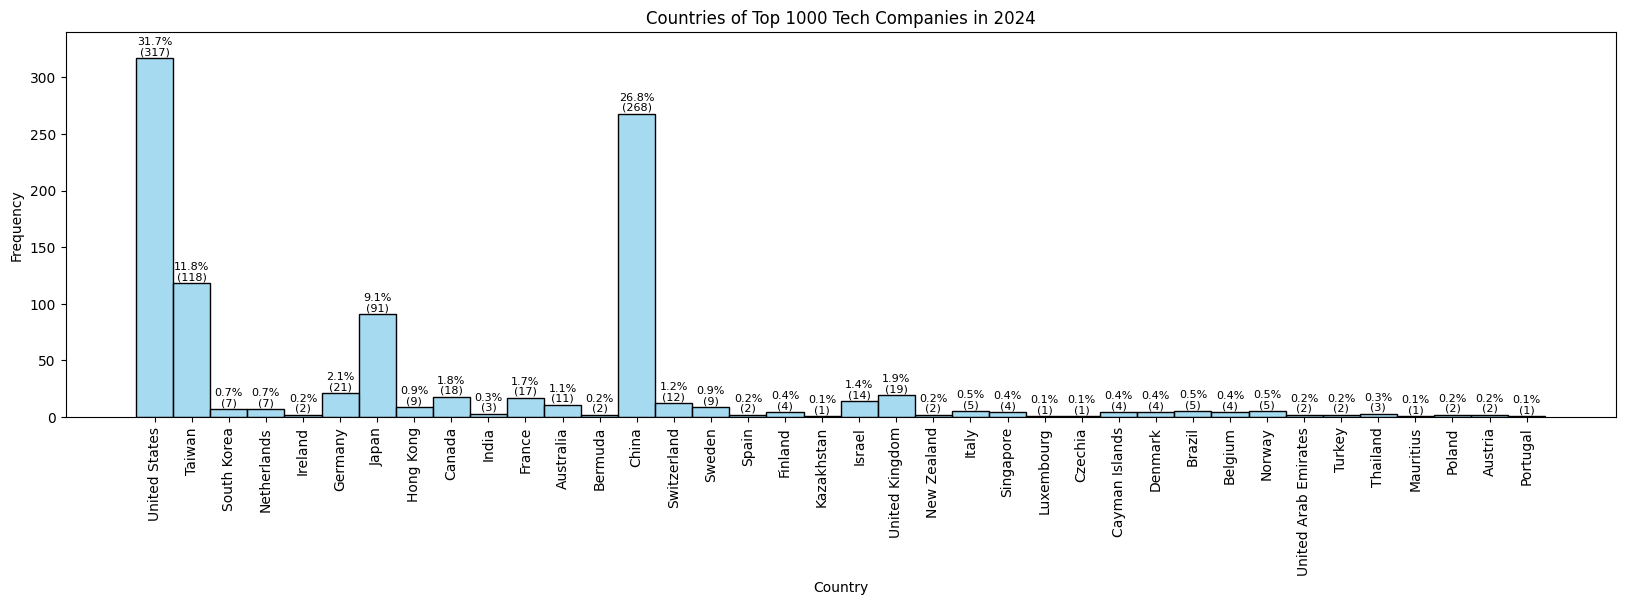

In [40]:
# --------- #
# Preparing #
# --------- #

country_counts = tech['Country'].value_counts()
country_percentages = 100 * (country_counts / country_counts.sum())


# -------- #
# Plotting #
# -------- #

plt.figure(figsize=(20, 5))
ax = sns.histplot(data=tech, x='Country', color='skyblue', edgecolor='black', linewidth=1)
plt.ylim((0, 340))

for p in ax.patches:
    height = p.get_height()
    percentage = (height / country_counts.sum()) * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 10, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'({int(height)})', ha='center', va='bottom', fontsize=8)

plt.title('Countries of Top 1000 Tech Companies in 2024')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

- The top 5 countries with the most top 1000 companies are: US 🇺🇸, China 🇨🇳, Taiwan 🇹🇼, Japan 🇯🇵, United Kingdom 🇬🇧.
- Nearly every third company from the top 1000 comes from the US 🇺🇸.
- 27% of all companies are out of China 🇨🇳.
- Every 10th company comes from from Taiwan 🇹🇼.
- Companies with only a single top 1000 company are: Kazakhstan 🇰🇿, Czech Republic 🇨🇿, Luxembourg 🇱🇺, Mauritius 🇲🇺, Portugal 🇵🇹.

## 💰 Market Caps per Country

In this section we are going to take a look at the overall market cap for all companies of each country. 

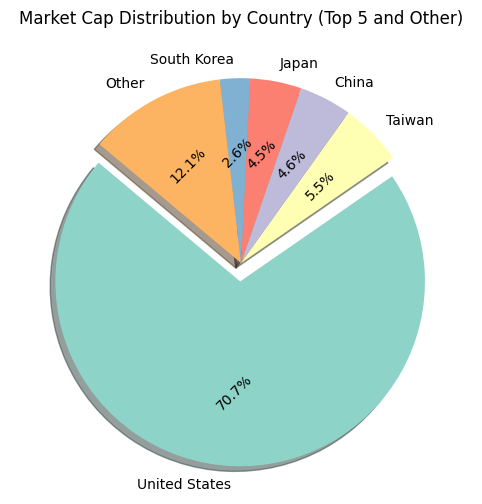

In [49]:
TOP_N = 5

def convert_market_cap(market_cap_str):
    """Convert 'Market Cap' to numeric by stripping the dollar signs, commas, and converting T to trillions."""
    if 'B' in market_cap_str:
        return float(market_cap_str.replace(' B', '').replace('$', '').replace(',', '')) * 1e9
    elif 'T' in market_cap_str:
        return float(market_cap_str.replace(' T', '').replace('$', '').replace(',', '')) * 1e12
    elif 'M' in market_cap_str:
        return float(market_cap_str.replace(' M', '').replace('$', '').replace(',', '')) * 1e6
    else:
        return float(market_cap_str.replace('$', '').replace(',', ''))


# --------- #
# Preparing #
# --------- #

tech['Market Cap Numeric'] = tech['Market Cap'].apply(convert_market_cap)
market_cap_by_country = tech.groupby('Country')['Market Cap Numeric'].sum()
top_n_by_country = market_cap_by_country.nlargest(TOP_N)
other = market_cap_by_country.nlargest(len(market_cap_by_country) - TOP_N).sum() - top_n_by_country.sum()
top_n_by_country['Other'] = other

# -------- #
# Plotting #
# -------- #
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    top_n_by_country, 
    labels=top_n_by_country.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('Set3', len(top_n_by_country)),
    explode=[0.1] + [0] * (len(top_n_by_country) - 1),
    shadow=True
)

for autotext in autotexts:
    autotext.set_rotation(45)
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.title(f'Market Cap Distribution by Country (Top {TOP_N} and Other)')
plt.show()

---


💚 Thank you for reading 💚

If you have any questions or feedback, feel free to leave a comment 🤔

This notebook is __still in progress__.

Please __UPVOTE__ if you enjoyed this notebook 🙏